In [1]:
import numpy as np
import matplotlib.pyplot as plt
from optim import *
from utils import *
from sklearn.linear_model import LinearRegression

In [19]:
def rates(xi,tau,alpha,beta):
    if alpha<tau+1/2 and beta<xi+1/2:
        return -1-2*beta
    if alpha==tau+1/2 and beta==xi+1/2:
        return -2*(xi+1)
    return 2*(max(alpha-beta-tau,-xi)-1)

begin_idx=100
k=5
niter=200
betas=np.linspace(1,4,20)
coefs=[]
theo_slopes=[rates(3/2,1/2,1/2,b) for b in betas]

for beta  in betas:
    m=np.zeros(niter+1-begin_idx)
    for _ in range(k):
        f=RandomQuadratic(n=1000)
        log,_=jacobi_momentum(f,beta=beta,niter=niter)
        m+=log['grad'][begin_idx:]
    m=m/niter
    
    model=LinearRegression()
    
    logx=np.log(np.arange(begin_idx,niter+1).astype(float))
    model.fit(logx[:,None],np.log(m))
    #plt.plot(np.exp(logx),np.exp(model.predict(logx[:,None])))
    #plt.plot(np.exp(logx),m)
    coefs.append(float(-model.coef_))
    


In [24]:
def rates(xi,tau,alpha,beta):
    if alpha<tau+1/2 and beta<xi+1/2:
        return -1-2*beta
    if alpha==tau+1/2 and beta==xi+1/2:
        return -2*(xi+1)
    return 2*(max(alpha-beta-tau,-xi)-1)

begin_idx=100
k=5
niter=200
betas=np.linspace(1,4,20)
coefs=[]
theo_slopes=[rates(3/2,1/2,1/2,b) for b in betas]

for beta  in betas:
    m=np.zeros(niter+1-begin_idx)
    c=[]
    for _ in range(k):
        f=RandomQuadratic(n=1000)
        log,_=jacobi_momentum(f,beta=beta,niter=niter)
        y=log['grad'][begin_idx:]

        model=LinearRegression()

        logx=np.log(np.arange(begin_idx,niter+1).astype(float))
        model.fit(logx[:,None],np.log(y))
        #plt.plot(np.exp(logx),np.exp(model.predict(logx[:,None])))
        #plt.plot(np.exp(logx),m)
        c.append(float(-model.coef_))
    coefs.append(c)
coefs=np.asarray(coefs)

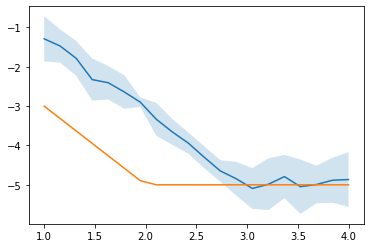

In [25]:
m,s=coefs.mean(1),coefs.std(1)
m=-m
plt.plot(betas,m)
plt.fill_between(betas,m-s,m+s,alpha=0.2)
plt.plot(betas,theo_slopes)

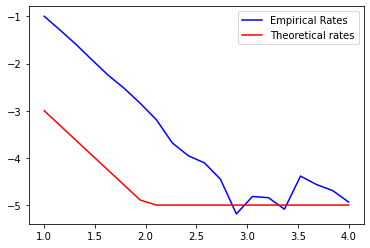

In [15]:
plt.plot(betas,-np.asarray(coefs),c='b',label='Empirical Rates')
plt.plot(betas,np.array(theo_slopes),c='r',label='Theoretical rates')
plt.legend()

##grad norm

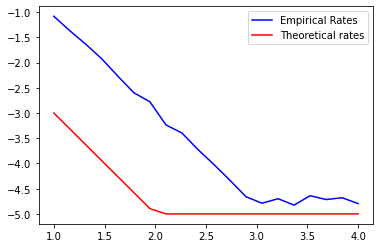

In [5]:
plt.plot(betas,-np.asarray(coefs),c='b',label='Empirical Rates')
plt.plot(betas,np.array(theo_slopes),c='r',label='Theoretical rates')
plt.legend()

##grad norm

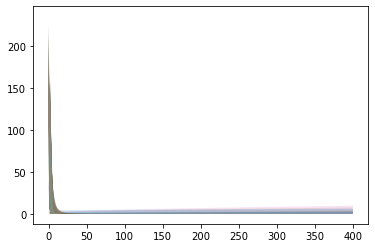

In [26]:
def rates(xi,tau,alpha,beta):
    if alpha<tau+1/2 and beta<xi+1/2:
        return -1-2*beta
    if alpha==tau+1/2 and beta==xi+1/2:
        return -2*(xi+1)
    return 2*(max(alpha-beta-tau,-xi)-1)

begin_idx=1
k=50
niter=400
xis=np.linspace(-0.99,3,20)
theo_slopes=[rates(3/2,1/2,1/2,b) for b in betas]
neste_slopé=[]
tags=['optimum','beta = 5','nesterov','gd']
slopes=[[] for _ in tags]
for xi  in xis:
    m=np.zeros(niter+1)
    logs=[[] for _ in range(len(tags))]
    for _ in range(k):
        f=BetaQuadratic(a=xi+1,b=3/2)
        for m,l in zip([jm_decorator(1/2,xi+1),jm_decorator(1/2,5),nesterov,gd],logs):
            log,_=m(f,niter=niter)
            l.append(list(log['f']))
    logs=np.asarray(logs)
    
    for l,clist,tag in zip(logs.transpose(1,0,2),slopes,tags):
        m,std=l.mean(0),l.std(0)
        plt.fill_between(np.arange(len(m)),l.min(0),l.max(0),alpha=0.2,label=tag)
    
            
    
    
        model=LinearRegression()

        logx=np.log(np.arange(begin_idx,niter+1).astype(float))
        model.fit(logx[:,None],np.log(m)[begin_idx:,None])
        clist.append(model.coef_)
    


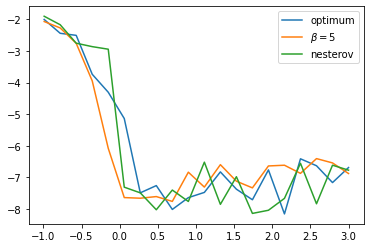

In [52]:
tags=['optimum',r'$\beta = 5$','nesterov']


for slope,tag in zip(slopes,tags):
    plt.plot(xis,np.array(slope).reshape(-1),label=tag)

    
    plt.legend()